In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv('Wholesale customers data.csv')
fulldata = data

In [2]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
from sklearn.cluster import KMeans

clusterdict = {'num':[], 'error':[]}

for num in range(15):
    if num > 0:
        kmeans = KMeans(n_clusters=num)
        kmeans.fit(data)
        clusterdict['num'].append(num)
        clusterdict['error'].append(kmeans.inertia_)

df = pd.DataFrame.from_dict(clusterdict)

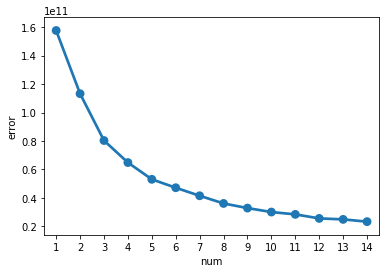

In [4]:
sns.pointplot('num', 'error', data = df, size=5,aspect=1)

There is a definite change in slope at 3 and 4, so I think that 3 Clusters will work best. However, there are only two channels (1 and 2) so maybe I'll try both ways and see which works better.

In [9]:
newdata = data.drop('Channel', axis=1)
kmeans = KMeans(2)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
np_data = data.values
labels = []
for row in np_data:
    vals = row.reshape(1, -1)
    label = kmeans.predict(vals)
    label= label[0]
    labels.append(label)
data['labels'] = labels
fulldata['labels'] = labels

In [12]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


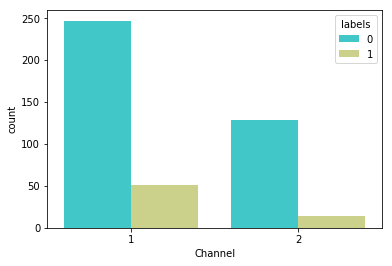

In [13]:
sns.countplot(x='Channel', hue='labels',palette='rainbow', data=data)

I was very surprised by this plot. For one thing, every row labeled '1' was correctly labeled, which is quite unusual and cool. However, the classifier did have trouble with label '0' because it placed many in the wrong category. Overall, though, this model did much better than some of my other ones.

Below, I'll try again with three clusters.

In [56]:
data2 = data.drop(['labels'], axis=1)

In [59]:
kmeans3 = KMeans(3)
kmeans3.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
np_data2 = data2.values
labels2 = []
for row in np_data2:
    vals = row.reshape(1, -1)
    label = kmeans3.predict(vals)
    label= label[0]
    labels2.append(label)
data2['labels2'] = labels2
fulldata['labels2'] = labels2

In [62]:
data2.head()

,Frozen,Detergents_Paper,labels2
0,214,2674,0
1,1762,3293,0
2,2405,3516,0
3,6404,507,0
4,3915,1777,0


/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


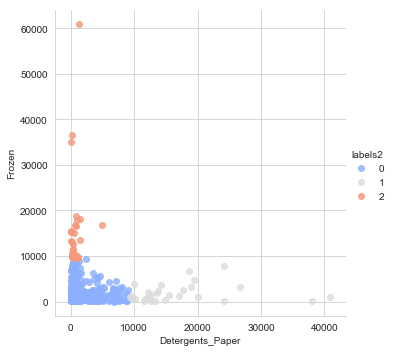

In [64]:
sns.lmplot('Detergents_Paper','Frozen',data=data2,hue='labels2', palette='coolwarm',size=5,aspect=1,fit_reg=False)

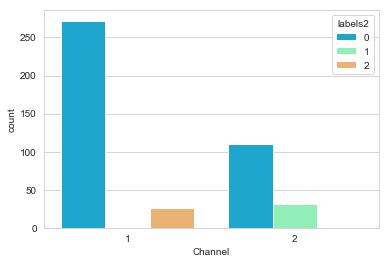

In [65]:
sns.countplot(x='Channel', hue='labels2',palette='rainbow', data=fulldata)

Interesting. Similar results with label 0, but label 1 and 2 were very distincitve and identified correctly every time.